# K-menas vector 2 dimensiones

## Proteinas y Calorias

In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
ruta_csv = "../datasets/foundation-food.csv"
df = pd.read_csv(ruta_csv, sep=',')

In [3]:
df

,id,food_category,name,water,calories,protein,total_fat,sfa,mufa,pufa,...,is_gluten_free,is_lacto_vegetarian,is_ovo_lacto_vegetarian,is_ovo_vegetarian,is_vegan,has_eggs,has_gluten,has_honey,has_meat,has_milk
0,1073,1,"CREMA, ÁCIDA O AGRIA, BAJA GRASA",71.0,181.0,7.00,14.10,8.70,4.10,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15083,15,"AZUCAR BLANCA, GRANULADA, FORTIF.C/VIT A Y HIE...",0.0,387.0,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1074,1,"CREMA, ÁCIDA O AGRIA, CULTIVADA",73.0,198.0,2.44,19.35,10.14,4.59,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1070,1,"CREMA, ACIDA O AGRIA, CULTIVADA, BAJA GRASA",80.0,135.0,2.94,12.00,7.47,3.47,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1071,1,"CREMA, ACIDA O AGRIA, LIVIANA",78.0,136.0,3.50,10.60,6.60,3.10,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,25044,25,"PASTA, SIN GLUTEN (MAIZ) COCIDA",68.0,126.0,2.63,0.73,0.10,0.19,0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,25045,25,"PASTA, SIN GLUTEN (MAIZ) CRUDA",10.0,357.0,7.46,2.08,0.29,0.54,0.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2654,25046,25,"PASTA, SIN GLUTEN (MAIZ, ARROZ), COCIDO",58.0,179.0,3.20,1.00,0.15,0.26,0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2655,25047,25,"PRETZELS, SIN GLUTEN (MAICENA, HARINA PAPA)",7.0,389.0,3.52,6.67,3.31,2.41,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
selected_cols = ['calories', 'protein']

In [5]:
foods = df[selected_cols].copy()
foods = foods.sample(n=10000, random_state=42)

In [6]:
foods.head()

,calories,protein
0,181.0,7.00
1,387.0,0.00
2,198.0,2.44
3,135.0,2.94
4,136.0,3.50


In [7]:
nulos_calories = foods['calories'].isnull().sum()
nulos_protein = foods['protein'].isnull().sum()

print(f"Nulos en 'calories': {nulos_calories}")
print(f"Nulos en 'protein': {nulos_protein}")

Nulos en 'calories': 0
Nulos en 'protein': 0


In [8]:
# Función para detectar outliers (IQR)
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return df[(df[columna] < limite_inf) | (df[columna] > limite_sup)].index

In [9]:
# Obtener índices de outliers para cada columna
outliers_calories_idx = detectar_outliers(foods, 'calories')
outliers_proteins_idx = detectar_outliers(foods, 'protein')
# Unión de índices de outliers
todos_outliers = outliers_calories_idx.union(outliers_proteins_idx)
print(f"Número total de outliers (calorias o proteinas): {len(todos_outliers)}")

# Eliminar outliers del DataFrame
foods_clean = foods.drop(index=todos_outliers)
print(f"Registros restantes tras eliminar outliers: {len(foods_clean)}")

Número total de outliers (calorias o proteinas): 68
Registros restantes tras eliminar outliers: 2589


## Outliners

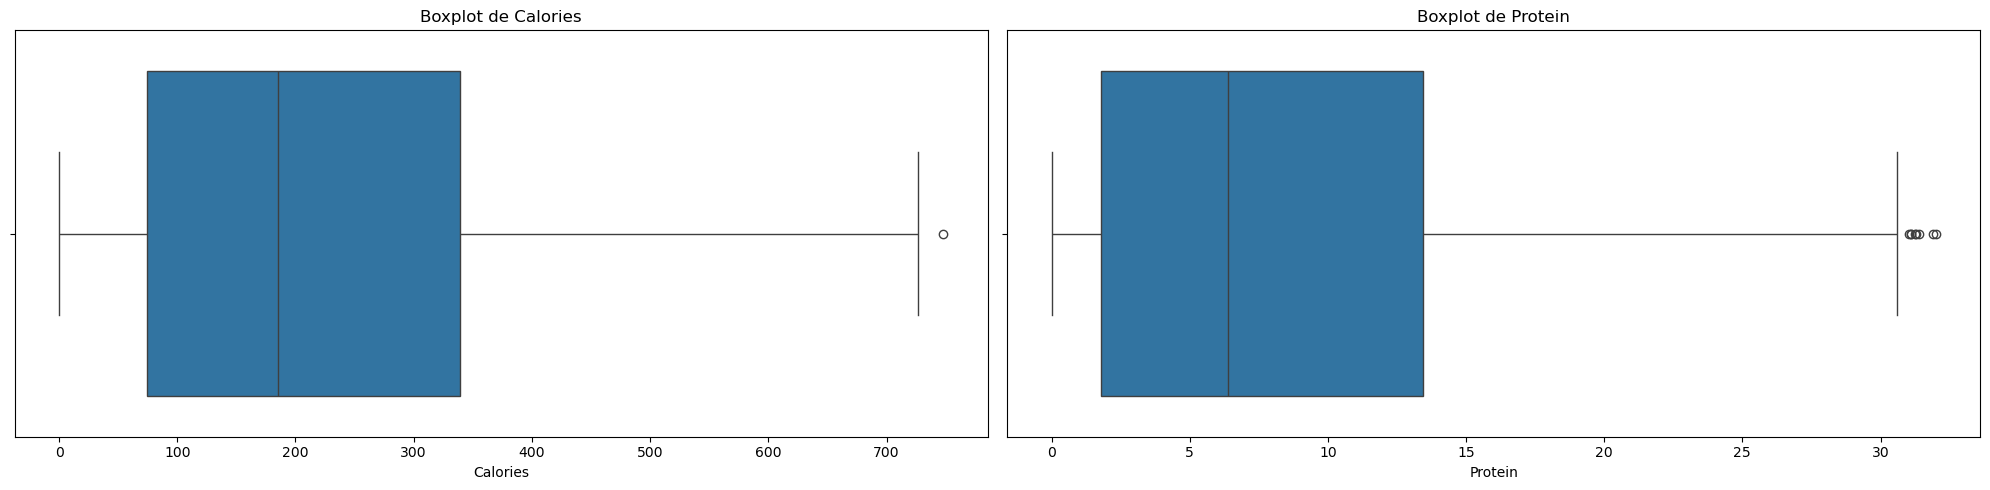

In [10]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 5))

# Boxplot para 'calories'
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, 1er gráfico
sns.boxplot(x=foods_clean['calories'])
plt.title('Boxplot de Calories')
plt.xlabel('Calories')

# Boxplot para 'protein'
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2do gráfico
sns.boxplot(x=foods_clean['protein'])
plt.title('Boxplot de Protein')
plt.xlabel('Protein')

# Mostrar las gráficas
plt.tight_layout()  # Ajusta automáticamente el espaciado
plt.show()

In [11]:
# Función para contar los outliers
def contar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico

    # Definir los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    return outliers

# Contar los outliers para 'calories' y 'protein'
outliers_calories = contar_outliers(foods_clean, 'calories')
outliers_protein = contar_outliers(foods_clean, 'protein')

# Imprimir el número de outliers
print(f"Número de outliers en 'calories': {len(outliers_calories)}")
print(f"Número de outliers en 'protein': {len(outliers_protein)}")

Número de outliers en 'calories': 1
Número de outliers en 'protein': 8


# K-means model

In [12]:
escalador = MinMaxScaler().fit(foods_clean.values)
foods_scaled = pd.DataFrame(escalador.transform(foods_clean.values), columns=['calories', 'protein'])

In [13]:
foods_scaled.head()

,calories,protein
0,0.241979,0.218750
1,0.517380,0.000000
2,0.264706,0.076250
3,0.180481,0.091875
4,0.181818,0.109375


In [14]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42).fit(foods_scaled.values)
foods_scaled["cluster"] = kmeans.labels_

## Exportar modelo

In [15]:
import joblib

In [16]:
# Guardar el escalador
joblib.dump(escalador, "./models/protein-calories-minmax-scaler.pkl")

# Guardar el modelo KMeans
joblib.dump(kmeans, "./models/protein-calories-kmeans-model.pkl")

['./models/protein-calories-kmeans-model.pkl']

## Export clustering csv

In [17]:
# Preparar información para CSV
foods_info = df.loc[foods_clean.index, ['id', 'calories', 'protein']].copy()
foods_info['cluster'] = kmeans.labels_

# Limpiar saltos de línea en 'name'
#foods_info['name'] = foods_info['name'].str.replace(r'[\r\n]+', ' ', regex=True).str.strip()

# Exportar CSV
#foods_info.to_csv("./out-csv/protein-calories-clustering.csv", index=False)

## Data Analysis

In [18]:
# Resumen mínimos y máximos por cluster
min_max_summary = foods_info.groupby('cluster')[['calories', 'protein']].agg(['min', 'max'])
print(min_max_summary)

        calories        protein       
             min    max     min    max
cluster                               
0           52.0  458.0    5.59  18.21
1            0.0  283.0    0.00   9.60
2          265.0  748.0    0.00  20.80
3           83.0  612.0   18.26  32.00


In [19]:
# Conteo de registros por cluster
counts = foods_info['cluster'].value_counts().sort_index()
print("Conteo de registros por cluster:")
print(counts)

Conteo de registros por cluster:
cluster
0     548
1    1082
2     559
3     400
Name: count, dtype: int64


## Clustering charts

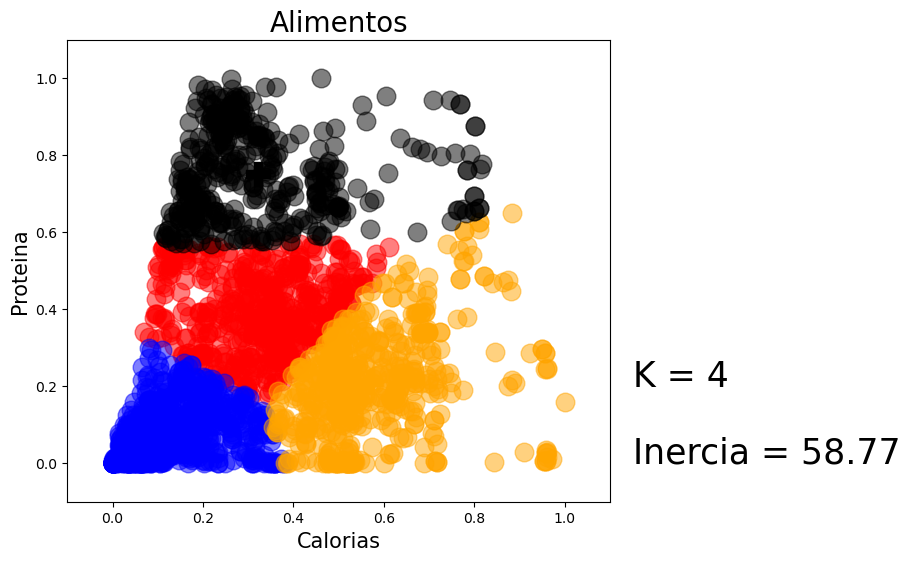

In [20]:
# Instrucciones para graficar los clusters

plt.figure(figsize=(7, 6), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(foods_scaled[foods_scaled["cluster"] == cluster]["calories"],
                foods_scaled[foods_scaled["cluster"] == cluster]["protein"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)

    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])

plt.title("Alimentos", fontsize=20)
plt.xlabel("Calorias", fontsize=15)
plt.ylabel("Proteina", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

del foods_scaled["cluster"]

# Método del Codo

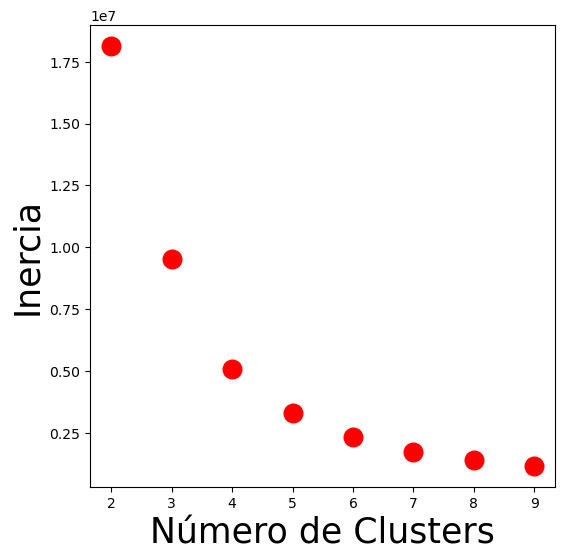

In [21]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(foods_clean.values)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="red")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()